<a href="https://colab.research.google.com/github/Priyanka-Gangadhar-Palshetkar/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_ml_w1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning and Artificial Intelligence: Week 1

**OBJECTIVES**

- Setting up coding environments
- Python Review: Functions and Classes
- NumPy Review: Arrays and Matrix Operations
- Introduction to Modeling Data


### Setting Up an Environment

During office hours we will mainly use Google Colab notebooks in a browser.  There are also many code files in the activities that you will want to be able to use locally.  You should download and install:

- [Anaconda](https://www.anaconda.com/products/distribution)
- [VSCode](https://code.visualstudio.com/download)



Additionally, if you are working on a windows machine I recommend downloading and installing [Git Bash](https://gitforwindows.org/) so you can use terminal operations.  

#### Python Review: Functions

Below, we complete a function to compute the mean squared error of a set of predictions given the predictions and actual value.  The big idea here is turning the following mathematical expression into a function (and later using this in a class).

$$MSE = \frac{1}{n}\sum_{i = 1}^n (y_i - \hat{y_i})^2$$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [4]:
def mean_squared_error(actual, predicted):
  '''
  This function takes in two iterables and 
  returns the mean squared error of predictions

  Parameters:
  -----------
  actual: list
  predicted: list

  Returns:
  -----------
  mean squared error --> float
  '''

  # n = len(actual)
  # mse = (1/n) * (actual - predicted)^2
  errors = []
  for y, y_hat in zip(actual, predicted):
    errors.append((y - y_hat)**2)
  return sum(errors)/len(actual)

In [2]:
# create x
actual = [1.2, 3.1, 5.4]
predicted = [1, 3, 5]
errors = []
for y, y_hat in zip(actual, predicted):
  errors.append((y - y_hat)**2)

In [3]:
sum(errors)/3

0.07000000000000009

In [5]:
#loop over list and apply 3*x + 4 + random number
x = list(range(1, 21))
y = [3*x + 4 + random.gauss(mu = 2, sigma = 2) for x in x]
y_hat = [3*x + 4 for x in x]

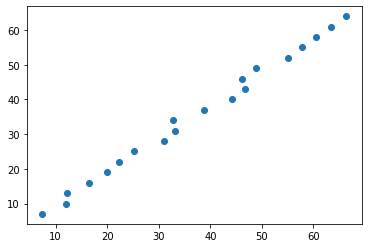

In [6]:
# visualize relationship
plt.scatter(y, y_hat)

In [ ]:
# predictions


In [ ]:
#visualize


In [7]:
# compute mean squared error
mean_squared_error(y, y_hat)

4.48328719027116

In [ ]:
# why so difficult (or slow?)
# mean((actual - predictions)**2). --> ideally less code and faster

### Using NumPy

NumPy will help us speed up our code and implement many vectorized operations.  The fundamental object for you will be the `np.array` -- and its associated operations.

In [8]:
#simple squaring function
def f(x):
  return x**2

In [9]:
#some inputs
x = [1, 2, 3, 4, 5, 6]

In [10]:
#evaluate at all
[f(x) for x in x]

[1, 4, 9, 16, 25, 36]

Let's look at the example for MSE from above again using numpy array's rather than lists.

In [11]:
#actual array
y_array = np.array(y)

In [12]:
#predicted array
yhat_array = np.array(y_hat)

In [13]:
#mse
mean_squared_error(y_array, yhat_array)

4.48328719027116

In [15]:
#vectorized function
np.mean((y_array - yhat_array)**2)

4.48328719027116

#### Problem: Mean Absolute Error

Implement a MAE according to the description:

$$MAE = \frac{1}{n}\sum_{i = 1}^n ||y_i - \hat{y_i}||$$

what do you think is an advantage of this metric?

In [16]:
def mean_absolute_error(actual, predicted):
   return np.mean(np.absolute(actual - predicted))

In [17]:
mean_absolute_error(y_array, yhat_array)

1.7233237691828436

### Using Data

Below, we load in a dataset related to restaurant tipping and aim to build a model to predict the tip given the bill amount.

In [18]:
import seaborn as sns

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
X = tips['total_bill'].values
y = tips['tip'].values

In [21]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

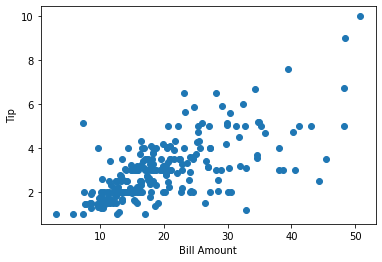

In [38]:
plt.scatter(X, y)
plt.xlabel('Bill Amount')
plt.ylabel('Tip');

### Possible Model

Imagine people tip on average 20%.  In this example, we would have a model:

$$y = .2X$$

Below we make predictions with the model and use our earlier functions to assess the error involved.

In [36]:
#define model
def model1(bill_amount):
  return 0.1431*bill_amount

In [27]:
#make predictions
y_hat = model1(X)

In [37]:
#mean squared error
mean_squared_error(y, y_hat)

2.667486278688524

In [29]:
#mean absolute error
mean_absolute_error(y, y_hat)

1.1442704918032787

In [ ]:
#plot the model alongside data


In [33]:
model = LinearRegression()

In [39]:
model.fit(X, y)
y_hat = model.predict(X)

ValueError: ignored

### Problem

Consider a different tip percentage.  Write this down and construct a model using your new percent.  Determine the MSE and MAE for your second model.  

-----

In your group, compare each of your percentage choices and the resulting MSE and MAE.  Which tip percent do you think is "the best"?  One representative from each group should be prepared to share the best model and corresponding MSE and MAE.

#### Exact Solution

It turns out there is a "best" solution in terms of MSE.  The equation that determines this looks like:

$$\text{best tip percentage} = (X^TX)^{-1}X^TY$$

Later we will find out where this came from, but for now we aim to use `numpy` to implement this and compare to what our best percentage was. 

In [43]:
X.shape

(244,)

In [44]:
X = X.reshape(-1, 1)

In [45]:
#transpose X^T
X.T

array([[16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
        14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
        16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
        12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
        16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
        18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
        25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
        18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
        26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
        16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
        28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
        12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
        18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
        10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
      

In [46]:
#matrix product
X.T@X

array([[114780.4443]])

In [47]:
#inverse
np.linalg.inv(X.T@X)

array([[8.7122855e-06]])

In [48]:
#put it together
np.linalg.inv(X.T@X)@X.T@y

array([0.1437319])

In [50]:
#new model
def best_model(x):
  return 0.1437319*x

In [51]:
#predictions
y_hat_best = best_model(X)

In [52]:
#MSE
mean_squared_error(y, y_hat_best)

array([1.17811612])

#### What's Next?

- Building models with libraries in Python
- Loading and manipulating data with `pandas` 
- Introduction to Classification and different Loss functions